In [64]:
from pringles.simulator import Simulator
mySimulator = Simulator(cdpp_bin_path='bin/', user_models_dir='src/')

In [65]:
atomics = dict([(atomic.__name__, atomic) for atomic in mySimulator.atomic_registry.discovered_atomics])
Server = atomics['Server']
print(Server)

<class 'pringles.models.models.Server'>


In [66]:
from pringles.models import Coupled 
a_server = Server("a_server", initialStatus="free", mean=5.0, setupTime="0:0:10:0")

print("Inport names: ", [port.name for port in a_server.inports])
print("Outport names: ", [port.name for port in a_server.outports])

Inport names:  ['job', 'powerSignal']
Outport names:  ['done', 'ready']


In [67]:
top_model = (Coupled(name='top', subcomponents=[a_server])
                .add_inport("job")
                .add_inport("powerSignal")             
                .add_outport("done")
                .add_outport("ready")
                .add_coupling(a_server.get_port('done'), "done")
                .add_coupling(a_server.get_port('ready'), "ready")
                .add_coupling('job', a_server.get_port("job"))
                .add_coupling('powerSignal', a_server.get_port("powerSignal"))
            )
top_model

In [68]:
from pringles.simulator import Simulation, Event
from pringles.utils import VirtualTime


In [69]:
sim_events = [
    Event(VirtualTime(0,0,10,0,0), top_model.get_port('job'), float(1)),
    Event(VirtualTime(0,0,30,0,0), top_model.get_port('job'), float(2))
]

a_simulation = Simulation(top_model = top_model, 
                          duration = VirtualTime.of_minutes(120), 
                          events=sim_events,
                          working_dir='sim_results/server'
                         )

# Executes the actual simulation
results = mySimulator.run_simulation(a_simulation)

In [70]:
print(results.get_process_output())

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from sim_results/server/2019-11-16-191544-51e48b1bbbfa4478bcaf65fb515ab6ae/top_model
Loading events from sim_results/server/2019-11-16-191544-51e48b1bbbfa4478bcaf65fb515ab6ae/events
Running parallel simulation. Reading models partition from 
Model partition details output to: /

In [71]:
display(results.output_df)

,time,port,value
0,00:00:12:246,done,1.0
1,00:00:42:200,done,2.0


In [72]:
print(results.logs_dfs.keys(),'\n\n')
display(results.logs_dfs['ParallelRoot'].head())

dict_keys(['a_server', 'top', 'ParallelRoot']) 




,0,1,message_type,time,model_origin,port,value,model_dest
0,0,L,Y,00:00:12:246,top(02),done,1.0,ParallelRoot(00)
1,0,L,Y,00:00:42:200,top(02),done,2.0,ParallelRoot(00)


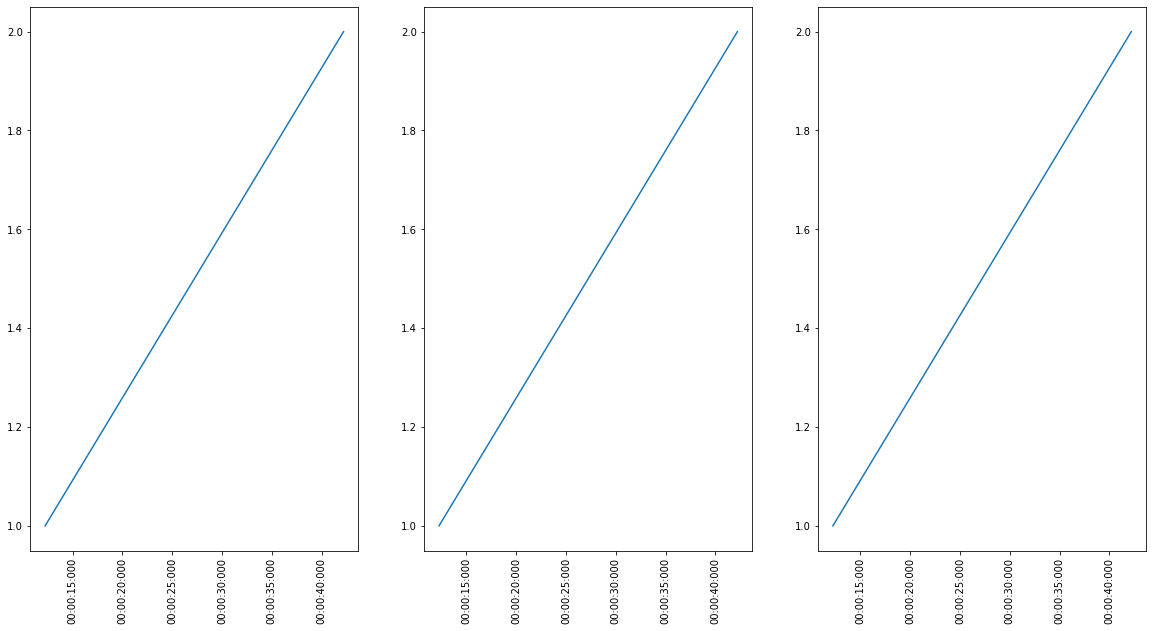

In [73]:
import matplotlib.pyplot as plt
from pringles.utils import vtime_decorate

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
results.plot_port('ParallelRoot', 'done', axes=vtime_decorate(axes[0]), index=0)
results.plot_port('ParallelRoot', 'done', axes=vtime_decorate(axes[1]), index=1)
results.plot_port('ParallelRoot', 'done', axes=vtime_decorate(axes[2]), index=2)